In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [2]:
# convert to dataframe
data = pd.read_csv('wine_dataset/wine-clustering.csv')
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

#### Definiciones de las Variables Predictoras

Este conjunto de datos contiene diferentes características químicas y físicas de los vinos.

##### **Variables Predictoras**

1. **Alcohol**  
   - Cantidad de **alcohol** presente en el vino, expresada en **% de volumen**.  
   - Relacionado con la fermentación y el tipo de uva utilizada.  

2. **Malic_Acid**  
   - Concentración de **ácido málico** en el vino (**g/L**).  
   - Contribuye a la **acidez** y frescura del vino.  

3. **Ash**  
   - **Ceniza** total del vino en **g/L**.  
   - Representa los residuos minerales después de la combustión del vino.  

4. **Ash_Alcanity** (Alcalinidad de la ceniza)  
   - Medida de la **alcalinidad** de la ceniza en términos de **miliequivalentes**.  
   - Se relaciona con la capacidad de **tampón** del vino.  

5. **Magnesium**  
   - **Magnesio** presente en el vino, medido en **mg/L**.  
   - Mineral importante para la **estructura** del vino y la fermentación.  

6. **Total_Phenols**  
   - Cantidad total de **fenoles** en el vino (**mg/L**).  
   - Afecta la **astringencia**, **color** y **capacidad antioxidante**.  

7. **Flavanoids**  
   - Tipo de **fenoles** relacionados con el **color**, el **sabor** y la **astringencia** del vino.  
   - Importantes en los vinos tintos.  

8. **Nonflavanoid_Phenols**  
   - Fenoles que **no** pertenecen a la familia de los flavonoides.  
   - Contribuyen a la **estructura** y **sensación en boca** del vino.  

9. **Proanthocyanins**  
   - Compuestos fenólicos que afectan el **color** y la **astringencia** del vino.  
   - Se encuentran en la piel y semillas de la uva.  

10. **Color_Intensity**  
    - Medida de la **intensidad del color** del vino.  
    - Se calcula a partir de la absorción de luz en el espectro visible.  

11. **Hue** (Tonalidad)  
    - Relación entre la absorbancia a 420 nm y 520 nm.  
    - Indica la **evolución** y **envejecimiento** del vino.  

12. **OD280** (OD280/OD315 Ratio of Diluted Wines)  
    - Relación de absorbancia a **280 nm**, utilizada para medir la **concentración de fenoles** en el vino.  
    - Se relaciona con la calidad y estructura del vino.  

13. **Proline**  
    - Concentración de **prolina**, un **aminoácido** presente en el vino (**mg/L**).  
    - Se asocia con la **madurez de la uva** y la calidad del vino.  




In [3]:
# revision de nulos 
data.isnull().sum()/ len(data) *100

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64

<Axes: >

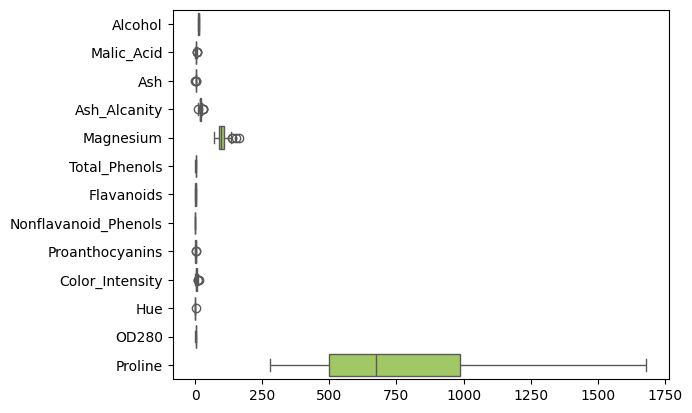

In [4]:
# detectar outliers
sns.boxplot(data=data, orient='h', palette='Set2')

In [12]:
data['Magnesium'].max()

np.int64(162)

In [13]:
data['Proline'].mean()

np.float64(746.8932584269663)

<Axes: ylabel='Ash'>

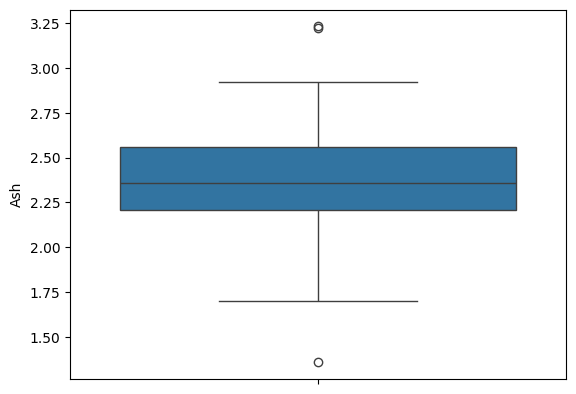

In [14]:
# box plot ash
sns.boxplot(data['Ash'])

<Axes: ylabel='Magnesium'>

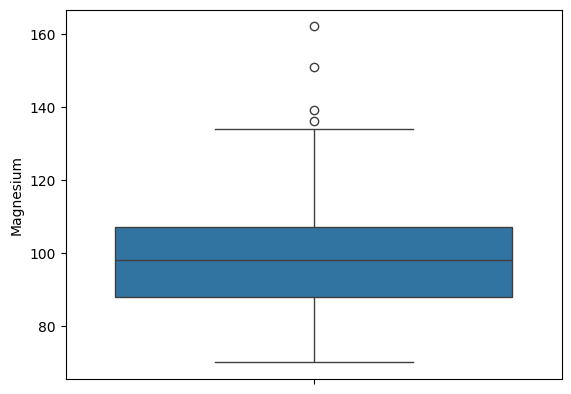

In [15]:
sns.boxplot(data['Magnesium'])

In [5]:
# normalizar  y estandarizar
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [18]:
len(data.columns)

13

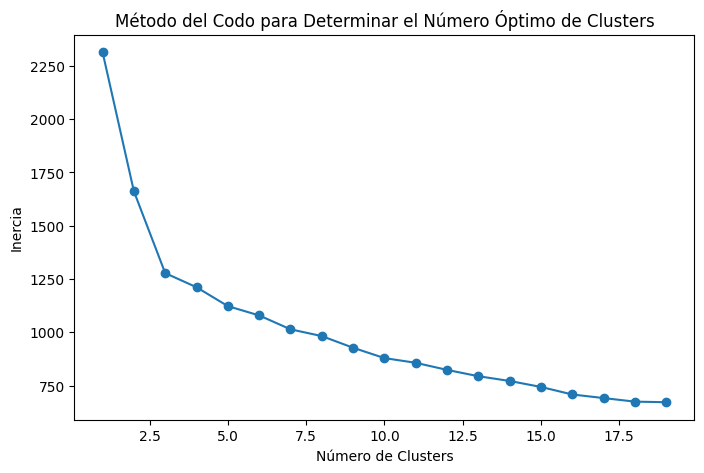

In [6]:
# Paso 2: Método del codo para determinar el número óptimo de clusters
inertia = []
K_range = range(1, 20)  # Probar de 1 a 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

In [17]:
inertia

[2314.0,
 1661.676116562651,
 1277.928488844642,
 1211.7531134671583,
 1123.156547079696,
 1079.538509158826,
 1014.4309086924654,
 982.6549762937699,
 927.9560760726212,
 879.4257007542495,
 857.3575599859922,
 824.1127198837441,
 794.4593223274677,
 772.1144780794749,
 744.1010168734099,
 708.7201983782389,
 691.9664315380539,
 675.1818642451276,
 672.4522111261763]

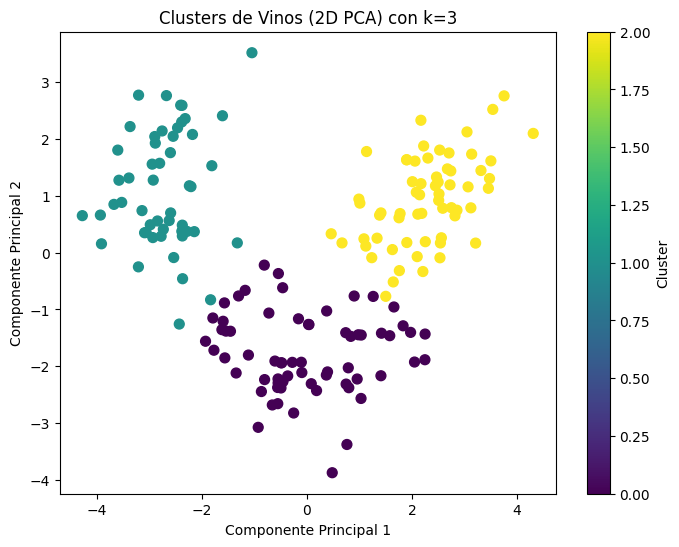

Silhouette Score: 0.28


In [7]:
k = 3  # Cambia este valor según el punto del codo en la gráfica
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Paso 4: Reducción de dimensionalidad con PCA para visualización
pca = PCA(n_components=2)  # Reducir a 2 dimensiones
pca_data = pca.fit_transform(data_scaled)
#
## Graficar los clusters en 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clusters de Vinos (2D PCA) con k={k}')
plt.colorbar(label='Cluster')
plt.show()

# Paso 5: Evaluar la calidad del clustering (opcional)
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

In [19]:
clusters

array([8, 8, 1, 8, 1, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 8, 7, 8, 7,
       8, 1, 1, 3, 1, 8, 1, 8, 1, 8, 1, 1, 1, 1, 1, 1, 6, 7, 8, 7, 8, 7,
       8, 7, 8, 8, 8, 8, 8, 8, 8, 1, 8, 1, 8, 1, 8, 6, 6, 6, 6, 0, 5, 0,
       0, 6, 6, 4, 5, 1, 5, 1, 0, 6, 6, 5, 4, 3, 0, 0, 5, 2, 0, 0, 5, 5,
       5, 5, 5, 5, 5, 0, 0, 4, 5, 0, 0, 0, 6, 6, 5, 5, 5, 5, 5, 5, 5, 0,
       7, 5, 3, 5, 5, 5, 5, 5, 2, 5, 0, 3, 3, 7, 7, 5, 5, 3, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9,
       9, 2, 9, 9, 9, 9, 2, 2, 2, 2, 9, 2, 9, 9, 9, 9, 2, 9, 9, 2, 9, 9,
       9, 9], dtype=int32)

# Silhouette Score: Definición e Interpretación

El **Silhouette Score** es una métrica utilizada para evaluar la calidad de los clusters generados por un algoritmo de clustering, como K-Means. Mide qué tan bien separados están los clusters y qué tan cohesionados están los puntos dentro de cada cluster. A diferencia del método del codo, que se basa en la inercia, el Silhouette Score proporciona una medida más interpretable y robusta.

---

## ¿Qué es el Silhouette Score?

El Silhouette Score para un punto individual se calcula de la siguiente manera:

1. **Cohesión (a)**: Distancia promedio del punto a todos los demás puntos en el mismo cluster.
2. **Separación (b)**: Distancia promedio del punto a todos los puntos en el cluster más cercano (el siguiente cluster más cercano).
3. **Silhouette Score para un punto**:
   \[
   s = \frac{(b - a)}{\max(a, b)}
   \]

   - Si \( s \) es cercano a **1**, el punto está bien asignado a su cluster.
   - Si \( s \) es cercano a **0**, el punto está cerca del límite entre dos clusters.
   - Si \( s \) es **negativo**, el punto podría estar asignado al cluster incorrecto.

4. **Silhouette Score global**: Es el promedio del Silhouette Score de todos los puntos en el dataset.

---

## Interpretación del Silhouette Score

El Silhouette Score global varía entre **-1** y **1**:
- **Cercano a 1**: Los clusters están bien separados y los puntos están bien asignados.
- **Cercano a 0**: Los clusters están muy cerca unos de otros, o los puntos están cerca de los límites entre clusters.
- **Negativo**: Los clusters están superpuestos o los puntos están mal asignados.

---

## ¿Cómo usar el Silhouette Score?

1. **Calcular el Silhouette Score para diferentes valores de \( k \)**:
   - Prueba diferentes números de clusters (\( k \)) y calcula el Silhouette Score para cada uno.
   - El valor de \( k \) con el mayor Silhouette Score es el mejor candidato.

2. **Graficar el Silhouette Score**:
   - Grafica el Silhouette Score en función de \( k \) para visualizar cuál es el mejor número de clusters.

---

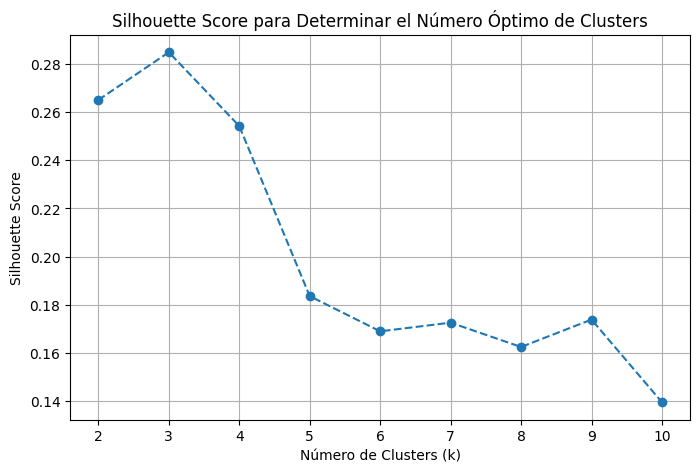

In [10]:

silhouette_scores = []
K_range = range(2, 11)  # Silhouette Score no funciona con k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, clusters)
    silhouette_scores.append(score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Determinar el Número Óptimo de Clusters')
plt.xticks(K_range)
plt.grid()
plt.show()

####¿Por qué se escoge el valor más alto del Silhouette Score?

El Silhouette Score mide dos aspectos clave de los clusters:

- Cohesión: Qué tan cercanos están los puntos dentro de un mismo cluster.

- Separación: Qué tan lejos están los puntos de un cluster respecto a los puntos de otros clusters.

Un Silhouette Score alto indica que:

- Los puntos dentro de un cluster están muy cerca unos de otros (alta cohesión).

- Los clusters están bien separados entre sí (alta separación).

Por lo tanto, el valor más alto del Silhouette Score representa la configuración de clusters que mejor equilibra estos dos aspectos.

### **Estandarización de Datos con StandardScaler**

La normalización de datos con `StandardScaler` en **scikit-learn** sigue la fórmula de la **estandarización** o **normalización Z-score**:


$X_{\text{scaled}} = \frac{X - \mu}{\sigma}$

### **Donde:**
- $ X $ es el valor original.
- $\mu$  es la **media** de la variable (promedio de todos los valores).
- $\sigma$ es la **desviación estándar** de la variable.
- $X_{\text{scaled}}$ es el nuevo valor transformado.

Esta transformación da como resultado una **distribución con media 0 y desviación estándar 1**, lo que es útil para algoritmos sensibles a la escala de los datos (como regresión logística, SVM y redes neuronales).

---
